# Исследование надежности заемщиков



<h2>Цель исследования:</h2>

>Выявить, влияет ли количество детей у клиента, семейное положение, распологаемый доход и цели взятия кредита на факт погашения кредита в срок

<h2>Описание данных:</h2>

Представленный датасет платёжеспособности клиентов банка включает следующие колонки:

 - children — количество детей в семье 
 - days_employed — общий трудовой стаж в днях
 - dob_years — возраст клиента в годах
 - education — уровень образования клиента
 - education_id — идентификатор уровня образования
 - family_status — семейное положение
 - family_status_id — идентификатор семейного положения
 - gender — пол клиента
 - income_type — тип занятости
 - debt — имел ли задолженность по возврату кредитов
 - total_income — ежемесячный доход
 - purpose — цель получения кредита
 
<h2>План работ:</h2>

- Изучение предоставленного датасета 
- Предобработка данных из датасета 
- Исследование данных



## Изучение общей информацию о данных

In [40]:
import pandas as pd

try:
    data = pd.read_csv('data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')
    


In [41]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод:** По результатом первичного просмотра данных известно, что в датасете 21525 строчка. Обнаружены пропуски в данных для колонки  days_employed и total_income. Так же необходимо перевести тип данных в колонке total_income на 'int' в целях удобного использования и просмотра данных.


## Предобработка данных

### Удаление пропусков

In [43]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [44]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

In [45]:
data['days_employed'] = data['days_employed'].abs()

In [46]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

In [47]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [48]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [49]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

In [50]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [51]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [52]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [53]:
data['education'] = data['education'].str.lower()

In [54]:
data.duplicated().sum()

71

In [55]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [56]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [57]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [58]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [59]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [60]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)


**Вывод:** Было обнаружено 2174 пропущенных значений в столбце 'total_income' и 'days_employed'. Пропущенные значения были заменены медианными значениями. Были удалены аномалии в столбце 'children', где присутстовавали значения -1 и 20.
Удален 71 дубликат строчек в датасете и созданы отдельные новые колонки с 'total_income_category' с присвоеными значениями дохода в зависимости от столбца total_income и столбец 'purpose_category' с категориями целей взятия кредита.


### Исследование данных

#### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [61]:
from matplotlib import pyplot as plt

#создание сводной таблицы с подсчетом количества клиентов всего, клиентов с задолженностью в каждой группе
# и средним значением задолженности по каждой группе 
debt_children = data.pivot_table(index = 'children', values = 'debt', aggfunc = ['count', 'sum', 'mean']) 

#перевод значений из колонки 'mean' в процентное отображение
debt_children['mean'] = round(debt_children['mean'] * 100, 2)

display(debt_children)


,count,sum,mean
,debt,debt,debt
children,,,
0,14091,1063,7.54
1,4808,444,9.23
2,2052,194,9.45
3,330,27,8.18
4,41,4,9.76
5,9,0,0.00


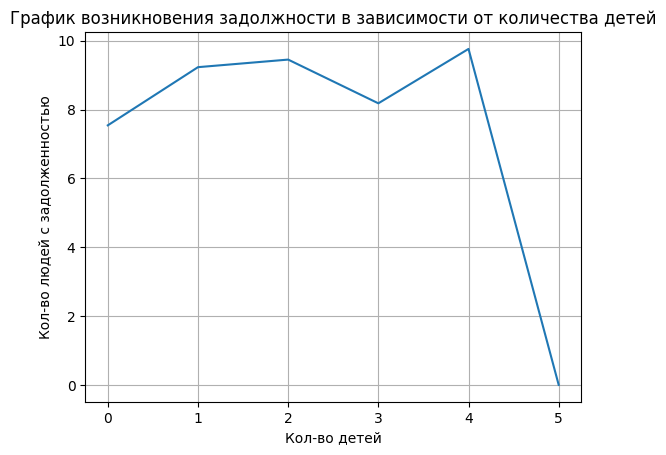

In [62]:
#для наглядной визуализации построим график
x_cord = [x for x in debt_children.index]
y_cord = [y for y in debt_children['mean']['debt']]

plt.title('График возникновения задолжности в зависимости от количества детей')
plt.xlabel('Кол-во детей')
plt.ylabel('Кол-во людей с задолженностью')

plt.grid()
plt.plot(x_cord, y_cord)
plt.show()


**Вывод:** 
Выоская доля возникновения задолженностей наблюдается у группы людей с 1, 2 и 4-мя детьми. Данные группы клиентов с большей вероятностью задержат оплату по кредиту. Аномальное значение у категории людей с 3-мя детьми, 8,18%. Данные расходятся по причине несбалансированной выборки, т.к. клиентов с 3-мя детьми всего 330 человек, в то время как клиентов у которых отсутствуют дети, есть 1 или 2 ребенка состовляет 14091, 4808 и 2052 соответственно. Для данной группы клиентов (0, 1, 2) наблюдается постепенный рост риска задолженности. Т.е количество детей влияет на риск появления задолжностей.

#### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [63]:
#создание сводной таблицы с подсчетом количества клиентов всего, клиентов с задолженностью в каждой группе
# и средним значением задолженности по каждой группе 
debt_family = data.pivot_table(index = 'family_status', values = 'debt', aggfunc = ['count', 'sum', 'mean']) 

#перевод значений из колонки 'mean' в процентное отображение
debt_family['mean'] = round(debt_family['mean'] * 100, 2)

display(debt_family)



,count,sum,mean
,debt,debt,debt
family_status,,,
Не женат / не замужем,2796,273,9.76
в разводе,1189,84,7.06
вдовец / вдова,951,63,6.62
гражданский брак,4134,385,9.31
женат / замужем,12261,927,7.56


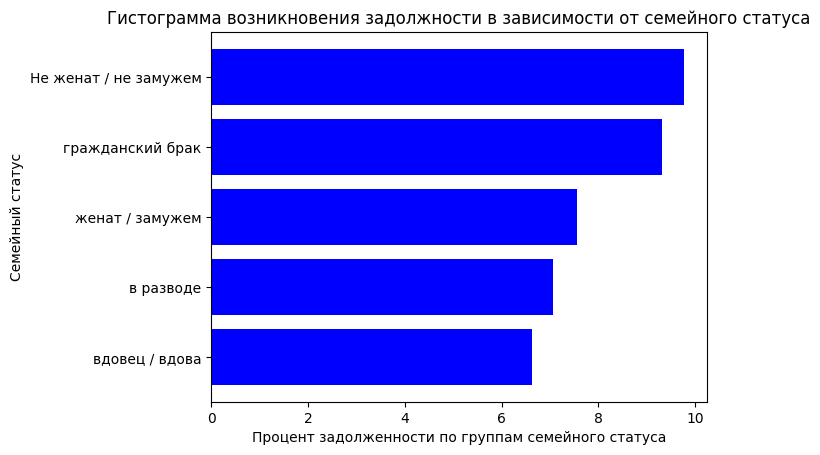

In [64]:
#для наглядной визуализации построим график
debt_family_sort = debt_family['mean'].sort_values(by = 'debt')

x_cord = [x for x in debt_family_sort.index]
y_cord = [y for y in debt_family_sort['debt']]

plt.title('Гистограмма возникновения задолжности в зависимости от семейного статуса')
plt.xlabel('Процент задолженности по группам семейного статуса')
plt.ylabel('Семейный статус')

plt.barh(x_cord, y_cord, color = 'blue')
plt.show()

**Вывод:** Чаще всего имеют задолженности перед банком люди состоящие в гражданском браке или не женатые/не замужем. Так же можно утверждать у что людей с семейными статусами "в разводе" и "вдовец / вдова" с меньшей вероятностью возникнет задолжность перед банком. Исходя из этого, можно утверждать что, зависимость между семейным положением и возвратом кредита в срок есть. Данная зависимость озвучивается как: люди с семейными статусами в разводе, вдовец/вдова с большей вероятностью вернут в срок кедит, чем одинокие и семейные пары.

#### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [65]:
# 0–30000 — 'E';
# 30001–50000 — 'D';
# 50001–200000 — 'C';
# 200001–1000000 — 'B';
# 1000001 и выше — 'A'

#создание сводной таблицы с подсчетом количества клиентов всего, клиентов с задолженностью в каждой группе
# и средним значением задолженности по каждой группе 
debt_income = data.pivot_table(index = 'total_income_category', values = 'debt', aggfunc = ['count', 'sum', 'mean']) 

#перевод значений из колонки 'mean' в процентное отображение
debt_income['mean'] = round(debt_income['mean'] * 100, 2)

display(debt_income)



,count,sum,mean
,debt,debt,debt
total_income_category,,,
A,25,2,8.00
B,5014,354,7.06
C,15921,1353,8.50
D,349,21,6.02
E,22,2,9.09


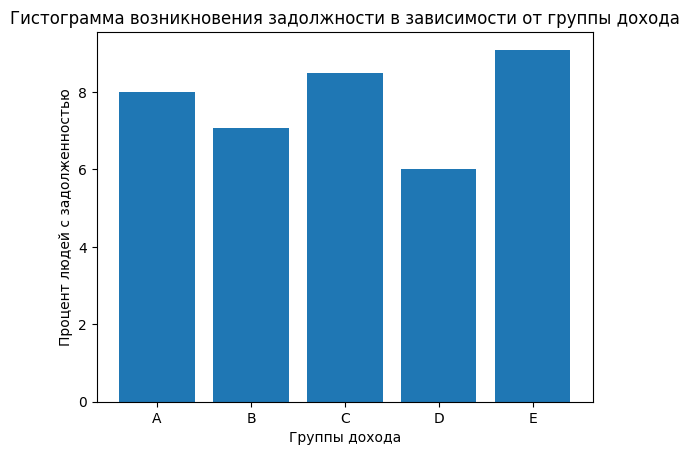

In [66]:
x_cord = [x for x in debt_income.index]
y_cord = [y for y in debt_income['mean']['debt']]

plt.title('Гистограмма возникновения задолжности в зависимости от группы дохода')
plt.xlabel('Группы дохода')
plt.ylabel('Процент людей с задолженностью')

plt.bar(x_cord, y_cord)
plt.show()



**Вывод:** По результатам исследования можно сдлеать вывод, что в данном случае выборки сильно несбалансированны, т.к. соновными клиентами банка(по даннаму датафрейму) являются людис со среднеми и выше среднего доходами. Данных в выборке недостаточно для полного подтверждения гипотезы, но их достаточно для утверждения того что у людей с группой дохода B меньше риск возникновения задолжности чем у людей с группой дохода С. 

####  Как разные цели кредита влияют на его возврат в срок?

In [67]:

#создание сводной таблицы с подсчетом количества клиентов всего, клиентов с задолженностью в каждой группе
# и средним значением задолженности по каждой группе 
debt_purpose = data.pivot_table(index = 'purpose_category', values = 'debt', aggfunc = ['count', 'sum', 'mean']) 

#перевод значений из колонки 'mean' в процентное отображение
debt_purpose['mean'] = round(debt_purpose['mean'] * 100, 2)

display(debt_purpose)




,count,sum,mean
,debt,debt,debt
purpose_category,,,
операции с автомобилем,4279,400,9.35
операции с недвижимостью,10751,780,7.26
получение образования,3988,369,9.25
проведение свадьбы,2313,183,7.91


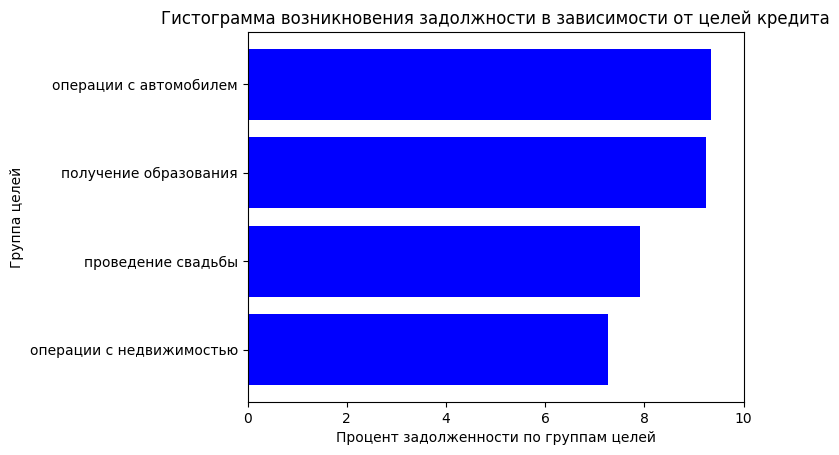

In [68]:
#для наглядной визуализации построим график
debt_purpose_sort = debt_purpose['mean'].sort_values(by = 'debt')

x_cord = [x for x in debt_purpose_sort.index]
y_cord = [y for y in debt_purpose_sort['debt']]

plt.title('Гистограмма возникновения задолжности в зависимости от целей кредита')
plt.xlabel('Процент задолженности по группам целей')
plt.ylabel('Группа целей')

plt.barh(x_cord, y_cord, color = 'blue')
plt.xlim(0,10)
plt.show()

**Вывод:** Чаще всего кредит не возвращаю по целям "операции с автомобилем" и "получение образования", что может говорить о существованию зависимости межу данными целями кредита и его своевременном возврате.

#### Ввозможные причины появления пропусков в исходных данных.

Ошибка при вводе данных, сокрытие информации, техническая ошибка при передаче данных.

#### Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Т.к. медиана распологается ровно в середие всего диапазона данных (ровно половина элементов диапазона больше медианы, и ровно половина элементов диапазона меньше медианы).

### Общий вывод.


<div style="border:solid steelgreen 4px; padding: 20px; border-radius: 15px">
<h1>Итог:</h1>
    
>Про результатом первичного просмотра данных были обнаружены пропуски в колонках days_employed и total_income. Так же обнаружен неудобный формат float для расчета числовых значений дохода клиентов банка в колонке total_income.

> Было обнаружено 2174 пропущенных значений в столбце 'total_income' и 'days_employed'. Пропущенные значения были заменены медианными значениями. Были удалены аномалии в столбце 'children', где присутстовавали значения -1 и 20.
Удален 71 дубликат строчек в датасете и созданы отдельные новые колонки с 'total_income_category'с присвоеными значениями дохода в зависимости от столбца total_income и столбец 'purpose_category' с категориями целей взятия кредита. Были выявлены все неявные дубликаты в срочке 'education', где встречались одлниковые значения но с различными вариантами записи.

> В ходе изучения данных были выявлены следующие зависимости: 
>>- При исследовании группы клиентов без детей, с 1 или 2-мя детьми наблюдается постепенный рост общего процента задолженности в группе. **Т.е количество детей влияет на риск появления задолжностей.**
>>- **Клиенты, с семейными статусами в разводе, вдовец/вдова с большей вероятностью вернут в срок кедит**, чем одинокие и семейные пары.
>>- **У клиентов с группой дохода B меньше риск возникновения задолжности чем у людей с группой дохода С**.
>>- **Задолженность реже всего возникает при взятии кредита на цели "операции с автомобилем" и "получение образования"**.

    
>Обобщая ход исследования, необходимо отметить, что все полученные результаты исследований, в большенстве своём, получены в несбалансированных выборках. Т.е. в клиентской базе банка преобладают клиенты определенного потребительского/покупательского/кредитного сегмента (близкими к друг к другу видами занятости, семейным положением, количеством детей и получаемым доходам и т.д.). При необходимости, для более глубокого анализа кредитной платёжеспособности клиентов необходимо расширить выборку данных и включить в неё больше информации о клиентах, не относящихся к основному сегменту данных услуг банка.

>Рекомендации по ведению базы данных о статистике палтёжеспособности клинтов:
>>Для более подробного ведения базы данных и её последующего анализа рекомендуем создать систему классификации клиентов по доходу (присвоение определенной группы A,B,C и т.д.) и создать короткий перечень обобщенных целей для сокращения объема записи данных.
</div>